# Apriori Algorithm (Association Rule Mining)

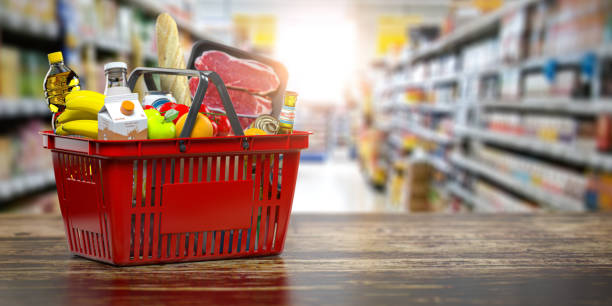

## Introduction

What is MBA?


Market Basket Analysis (MBA) is a technique that helps retailers identify the patterns of purchases that occur when various items are bought together. It uses statistical concepts such as support, confidence, lift to generate rules that can be used to interpret the purchase/shopping behavior, 



## Association Rules

Apriori Algorithm is an algorithm for extracting the frequent item-sets with application in association rule learning. In general, the apriori algorithm has been developed to work on databases containing large number of transactions. For instance, purchases by customers of a store. The item-set is considered as ‘frequent’ if it meets a user-specified support threshold. For example, if the support threshold is set to 0.4, this indicates that a frequent item-set which is defined as a set of items that found together in at least 40% of all transactions in the database. 



Association rules analysis can reveal how items are related to each other.  

## Measure 1: Support. 
This measure shows the popularity of an itemset using the proportion of transactions in which an itemset occurs. In Table 1 below, the support of {apple} is 4 out of 8, or 50%. Itemsets can also includes multiple items. For example, the support of {apple, juice, rice} is 2 out of 8, or 25%.

$supp(X⇒Y)=(|X∪Y|)/(n)$



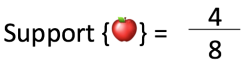


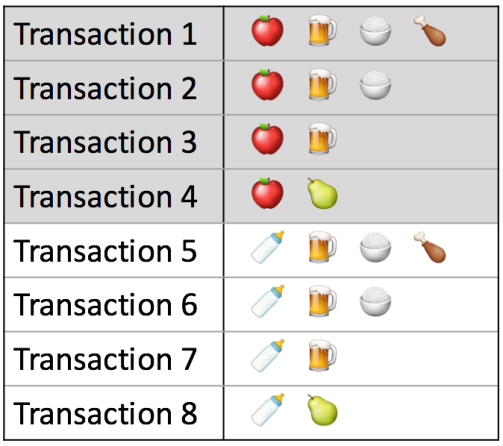

If you discover that sales of items beyond a certain proportion tend to have a significant impact on your profits, you might consider using that proportion as your support threshold. You may then identify itemsets with support values above this threshold as significant itemsets.

## Measure 2: Confidence. 

This measure shows how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears. In Table 1, the confidence of {apple -> beer} is 3 out of 4, or 75%.

$conf(X⇒Y)=(supp(X∪Y))/(supp(X))$

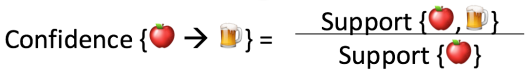

One drawback of the confidence measure is that it might misrepresent the importance of an association. This is because it only accounts for how popular apples are, but not beers. If beers are also very popular in general, there will be a higher chance that a transaction containing apples will also contain beers, thus inflating the confidence measure. To account for the base popularity of both constituent items, we use a third measure called lift.

## Measure 3: Lift. 

This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. In Table 1, the lift of {apple -> beer} is 1,which implies no association between items. A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought.

$lift(X⇒Y)=(supp(X∪Y))/(supp(X)supp(Y))$

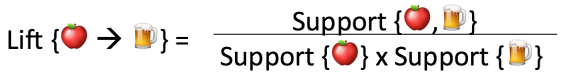

## Note: You are required to work with Numpy


Consider the following dataset, which includes a database from a store with (9834) transactions of different customers buying different items from that store. Write a python program that explore the correlations between the different items in the store. Therefore, you can predict if one customer is buying banana, mango, and apple, then what is the next item the customer would be interested in.  You are required to implement the Apriori Algorithm in order to find out the frequent item-sets which are most likely to be purchased by customers. 



<div class="alert alert-block alert-danger">
<b>Just don't:</b> call the already made apriori function (from mlxtend.frequent_patterns import apriori)
</div>

## Algorithm Pseduo Code



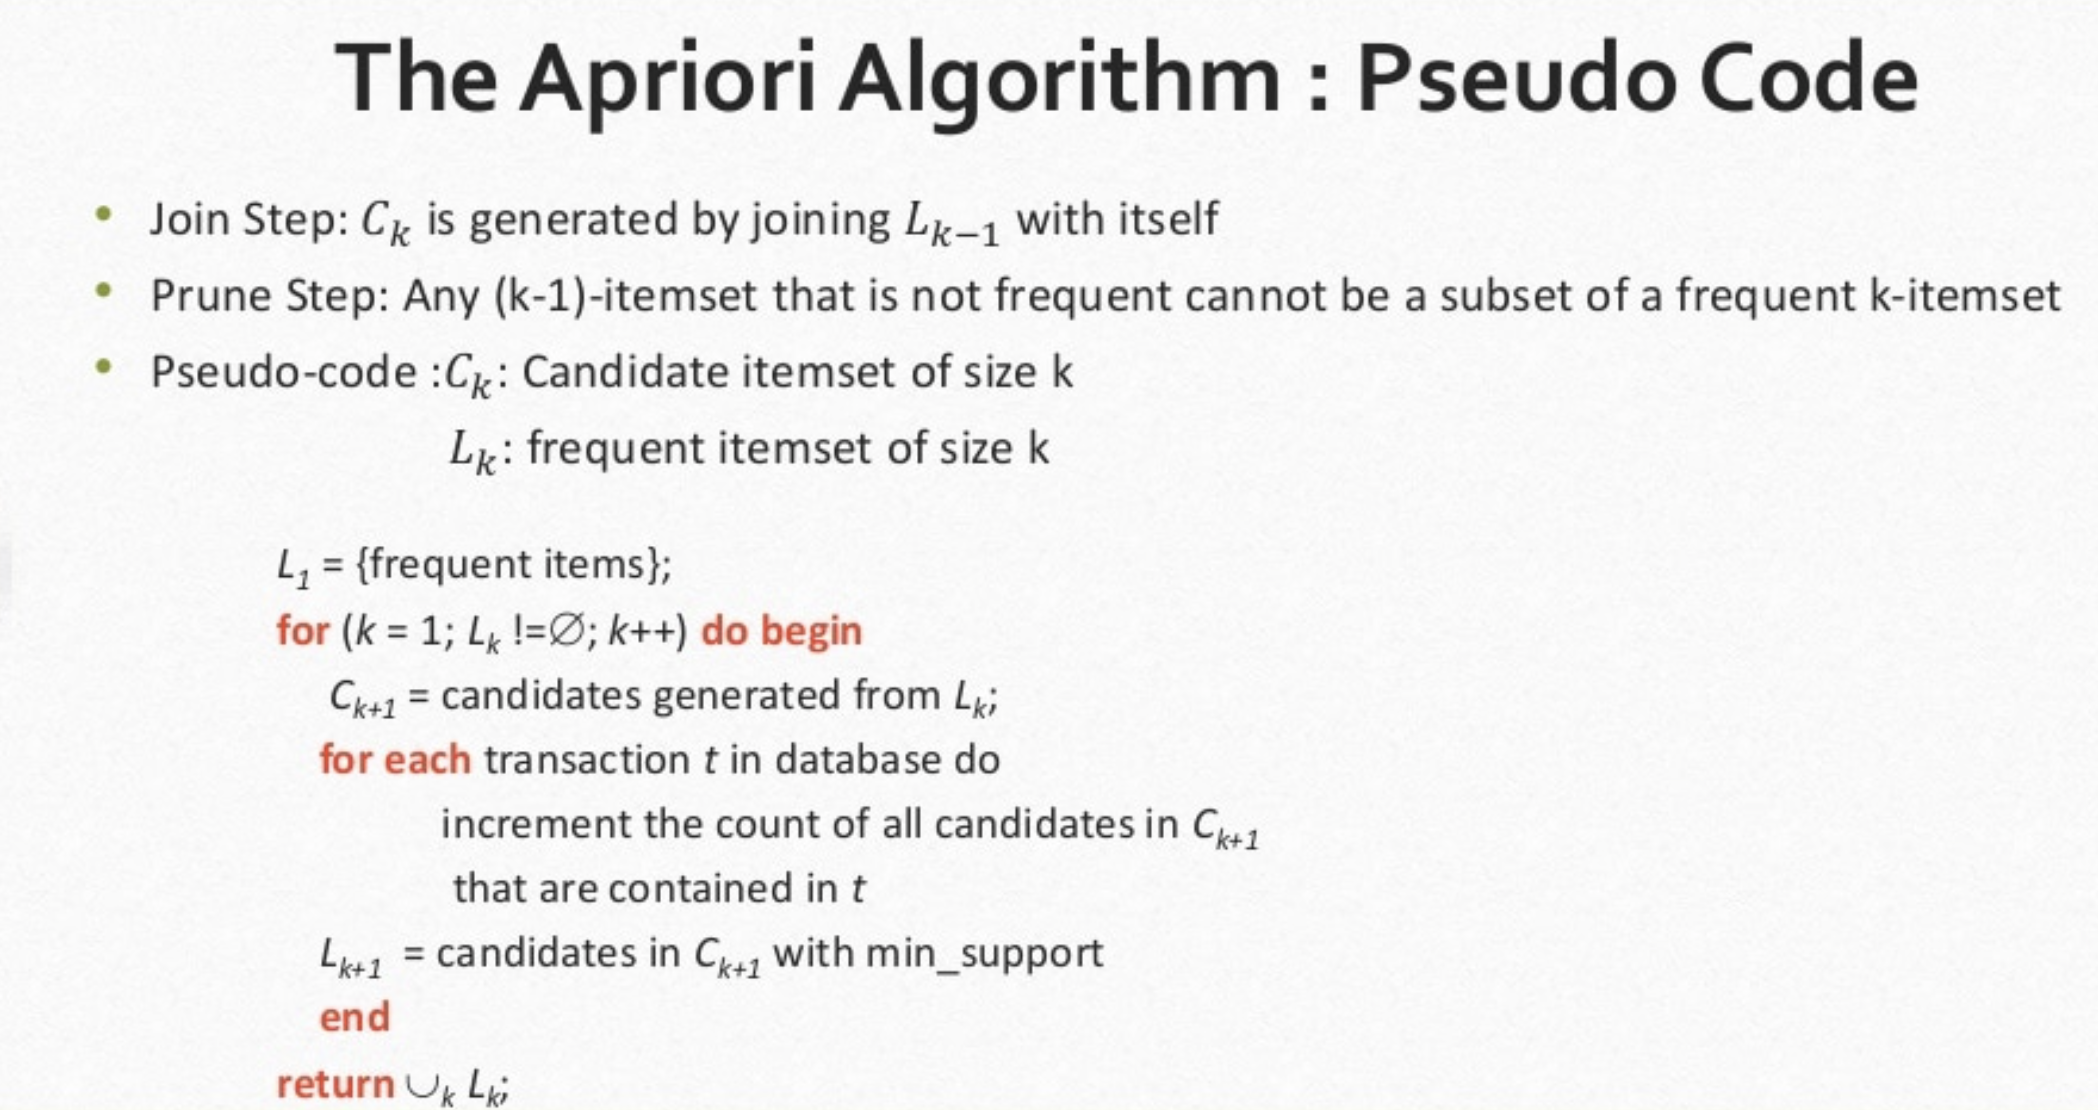



To sum up, the basic components of Apriori can be written as
- Use k-1 itemsets to generate k itemsets
- Getting C[k] by joining L[k-1] and L[k-1]
- Prune C[k] with subset testing
- Generate L[k] by extracting the itemsets in C[k] that satisfy minSup

Simulate the algorithm in your head and validate it at the end.

Helpful video https://youtu.be/guVvtZ7ZClw 

more information:

https://morioh.com/p/9b53cedbd235

https://www.slideshare.net/INSOFE/apriori-algorithm-36054672

## Import Important Libraries

In [1]:
import pandas as pd
import numpy  as np
from itertools import permutations, combinations, chain
from functools import reduce

## Import The dataset

In [71]:
dataset = pd.read_csv('groceriesList.csv', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
#take first 5000 samples
dataset=dataset[:5000]

In [73]:
#replace NAN value withe  space value
dataset.fillna('_',inplace=True)

In [74]:
def support(data,item):
    suport=sum([1  for x in data if subset(item,x)])
    support=int(spupport /len(data))
    return support 

In [75]:
def confidnace(data,items): 
    support_items=int(sum([1 for x in data if subset(items,x)])/len(data))
    #item[1,2,3,4] support_item_1=[1,2,3]
    support_items_1=support(data,item[:-1])
    return support_items/support_items_1

In [76]:
def lift(data,items):
    result = support(data,items)/(support(data,items[0])*support(data,items[1]))
    return result
    

In [77]:
all_items_duplcatied=[x for y in dataset.values for x in y  if  x is not '_' ]

#get all item from the dataset
all_items=list( set(all_items_duplcatied))
all_items.append('_')
print('all items numbers = ',len(all_items))

all items numbers =  169


In [78]:
# using lambda function to encode the data
convert=lambda x : all_items.index(x)

In [79]:
convert('whole milk')

100

In [80]:
#flatten the dataset to make it row
dataset_1=dataset.values.flatten()

In [81]:
#using convert to encode all items in dataset
dataset_1=[convert(x)  for x in dataset_1  ]

In [82]:
#reshape the dataset to orginl shape
dataset_1=np.reshape(dataset_1,[x for x in dataset.shape])
dataset_1.shape

(5000, 32)

In [83]:
# convert it to DataFrame
dataset=pd.DataFrame(dataset_1)
dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,72,82,151,28,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168
1,3,160,76,168,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168
2,100,168,168,168,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168
3,122,160,36,4,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168
4,27,100,23,45,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,103,3,27,92,120,1,43,159,37,168,...,168,168,168,168,168,168,168,168,168,168
4996,11,27,105,168,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168
4997,40,168,168,168,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168
4998,161,16,168,168,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168


In [84]:
#using lambda function to cheke if list is subsetform another list 
subset=lambda l1 ,l2:l1==[x for x in l2 if x in l1]
 

In [85]:
 #simple dataset

data= [['A','B'],
       ['B','D'],
       ['B','C'],
       ['A','B','D'],
       ['A','C'],
       ['B','C'],
       ['A','C'],
       ['A','B','C','E'],
       ['A','B','C']]
 

In [119]:
import copy 

def apriori(data_d,minsport):    
    item1=[]
    for y in data_d:
        for x in y:
            if x not in item1:
                item1.append(x)
     
    item1=[[x,0] for x in item1]
    for i in range(len(item1)):
        for j in range(len(data_d)):
            if item1[i][0] in data_d[j]:
                item1[i][1]+=1
    l1_item=[x[0] for x in item1 if x[1]>=minsport]
    
     
    for k in range(2,5):
        
        ci=list(combinations(l1_item,k)) #[a,b,c]
        #[[[a,b],5],[[a,c],3] minsport=4
        ci=[[list(x),0] for x in ci ]
         
        print(len(ci))
        
        for i in range(len(ci)):
            b= [1 for x in data_d if subset(ci[i][0],x)]
            ci[i][1]=sum(b) 
        print('ci befor prun')
        print(ci)
        ci=[x[0] for x in ci if x[1]>=minsport]#prun
        print('ci befor prun')
        print(ci)
        l1_item=[]
        for y in ci:
            for x in y:
                if x not in l1_item:
                    l1_item.append(x)
         
        print(ci)
    


In [120]:
a=apriori(data,2)

6
ci befor prun
[[['A', 'B'], 4], [['A', 'D'], 1], [['A', 'C'], 4], [['B', 'D'], 2], [['B', 'C'], 4], [['D', 'C'], 0]]
ci befor prun
[['A', 'B'], ['A', 'C'], ['B', 'D'], ['B', 'C']]
->
---> 0.0009963512420654297
[['A', 'B'], ['A', 'C'], ['B', 'D'], ['B', 'C']]
4
ci befor prun
[[['A', 'B', 'C'], 2], [['A', 'B', 'D'], 1], [['A', 'C', 'D'], 0], [['B', 'C', 'D'], 0]]
ci befor prun
[['A', 'B', 'C']]
->
---> 0.0
[['A', 'B', 'C']]
0
ci befor prun
[]
ci befor prun
[]
->
---> 0.0
[]


In [121]:
a=apriori(data,2)

6
ci befor prun
[[['A', 'B'], 4], [['A', 'D'], 1], [['A', 'C'], 4], [['B', 'D'], 2], [['B', 'C'], 4], [['D', 'C'], 0]]
ci befor prun
[['A', 'B'], ['A', 'C'], ['B', 'D'], ['B', 'C']]
->
---> 0.0
[['A', 'B'], ['A', 'C'], ['B', 'D'], ['B', 'C']]
4
ci befor prun
[[['A', 'B', 'C'], 2], [['A', 'B', 'D'], 1], [['A', 'C', 'D'], 0], [['B', 'C', 'D'], 0]]
ci befor prun
[['A', 'B', 'C']]
->
---> 0.0
[['A', 'B', 'C']]
0
ci befor prun
[]
ci befor prun
[]
->
---> 0.0
[]


In [122]:
min_suport=40
apriori(dataset.values,min_suport)

5050
ci befor prun
[[[72, 82], 15], [[72, 151], 48], [[72, 168], 0], [[72, 3], 105], [[72, 160], 108], [[72, 76], 34], [[72, 100], 171], [[72, 122], 75], [[72, 36], 33], [[72, 27], 154], [[72, 23], 5], [[72, 45], 16], [[72, 8], 52], [[72, 92], 100], [[72, 48], 24], [[72, 24], 29], [[72, 35], 2], [[72, 77], 12], [[72, 115], 18], [[72, 120], 76], [[72, 66], 29], [[72, 78], 42], [[72, 130], 19], [[72, 101], 12], [[72, 162], 0], [[72, 103], 0], [[72, 1], 68], [[72, 73], 0], [[72, 154], 33], [[72, 43], 53], [[72, 157], 43], [[72, 161], 6], [[72, 55], 9], [[72, 164], 22], [[72, 16], 55], [[72, 119], 10], [[72, 54], 16], [[72, 144], 95], [[72, 134], 11], [[72, 46], 6], [[72, 159], 18], [[72, 37], 21], [[72, 62], 17], [[72, 17], 21], [[72, 121], 0], [[72, 5], 42], [[72, 86], 44], [[72, 79], 15], [[72, 11], 0], [[72, 31], 28], [[72, 94], 38], [[72, 163], 0], [[72, 135], 31], [[72, 80], 62], [[72, 81], 19], [[72, 68], 24], [[72, 39], 52], [[72, 2], 9], [[72, 6], 14], [[72, 99], 19], [[72, 14], 2

KeyboardInterrupt: 